In [ ]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from ipywidgets import interact, widgets
sns.set(rc={'figure.figsize':(11, 4)})
import plotly as py
import plotly.tools as tls 

%matplotlib inline

In [2]:
gunviolence = pd.read_pickle("gunviolence.pkl")

# Hate Crime

In [3]:
# Load the cleaned data frame from previous Notebook 
hatecrime= pd.read_pickle("HC.pkl")

In [4]:
hatecrime

,STATE_NAME,REGION_NAME,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,BIAS_DESC
0,Arkansas,South,1991-08-31,1,White,Intimidation,1.0,Anti-Black or African American
1,Arkansas,South,1991-09-19,1,Black or African American,Simple Assault,1.0,Anti-White
2,Arkansas,South,1991-07-04,1,Black or African American,Aggravated Assault,1.0,Anti-Black or African American
3,Arkansas,South,1991-12-24,1,Black or African American,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Anti-White
4,Arkansas,South,1991-12-23,1,Black or African American,Aggravated Assault,1.0,Anti-White
5,Arkansas,South,1991-07-27,1,Black or African American,Robbery,1.0,Anti-White
6,Arkansas,South,1991-11-14,2,Black or African American,Aggravated Assault,1.0,Anti-White
7,Arkansas,South,1991-07-10,1,Black or African American,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Anti-White
8,Arkansas,South,1991-10-06,2,Black or African American,Intimidation,1.0,Anti-White
9,Arkansas,South,1991-10-04,10,Black or African American,Robbery,2.0,Anti-White


In [5]:
hatecrime['YEAR'] = hatecrime['INCIDENT_DATE'].dt.year
hatecrime.head()

,STATE_NAME,REGION_NAME,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,BIAS_DESC,YEAR
0,Arkansas,South,1991-08-31,1,White,Intimidation,1.0,Anti-Black or African American,1991
1,Arkansas,South,1991-09-19,1,Black or African American,Simple Assault,1.0,Anti-White,1991
2,Arkansas,South,1991-07-04,1,Black or African American,Aggravated Assault,1.0,Anti-Black or African American,1991
3,Arkansas,South,1991-12-24,1,Black or African American,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Anti-White,1991
4,Arkansas,South,1991-12-23,1,Black or African American,Aggravated Assault,1.0,Anti-White,1991


In [6]:
hc1=hatecrime[['TOTAL_INDIVIDUAL_VICTIMS','YEAR']]

In [ ]:
hc1['TOTAL_INDIVIDUAL_VICTIMS'].plot('YEAR', 'TOTAL_INDIVIDUAL_VICTIMS', lw = 2, color = '#539caf', alpha = 1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'crime'

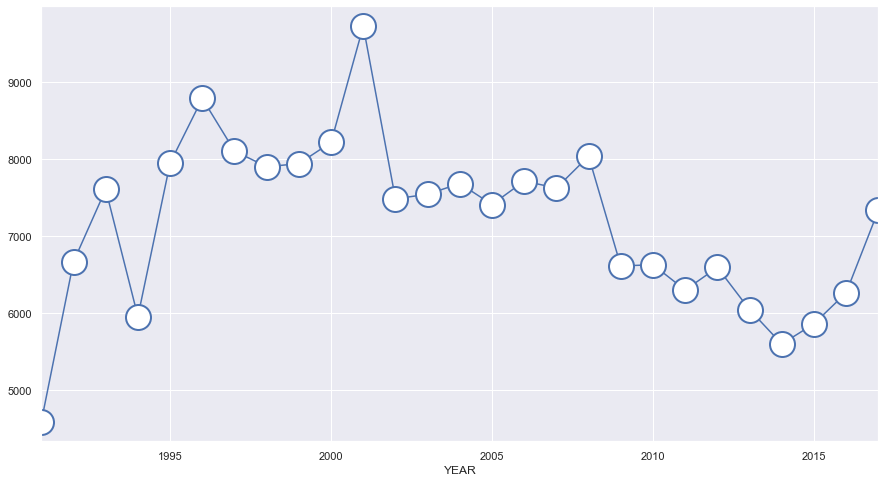

In [8]:
crime = hc1.groupby('YEAR').size().plot(figsize=(15,8), marker='o', ms=25, mew=2, mfc='white')
plt.crime(hc1.groupby('YEAR').size().mean(), color='red', ls='--', lw=1.4)
for i,j in crime.groupby('YEAR').size().iteritems():
    ax.annotate(j, (i,j), fontsize=15, va='center', ha='center')
plt.xlim(1991,2017)
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.show()

In [ ]:
reg= hatecrime[['YEAR','REGION_NAME','TOTAL_INDIVIDUAL_VICTIMS']]

In [ ]:
sns.heatmap(reg.groupby(['YEAR','REGION_NAME']).size().unstack(), annot=True, annot_kws={"size":12}, cmap="pink_r")
plt.ylabel('Year')
plt.xlabel('Region')
plt.show()

In [ ]:
data =[dict(type='choropleth', autocolorscale=False, locations = hatecrime['STATE_NAME'], z=hatecrime['TOTAL_INDIVIDUAL_VICTIMS'], locationmode='USA-states',
           text= hatecrime['STATE_NAME'], colorscale = 'custom-colorscale', colorbar=dict(title="Hate Crime"))]

In [ ]:
data

In [ ]:
layout= dict(title='Number of Hate Crimes Per State',
             geo= dict(scope='usa', projection=dict(type='albers usa'), showlakes=True, lakecolor='rgb(66,165,245)',),)

layout

In [ ]:
fig= dict(data=data, layout=layout)

py.iplot(fig, filename= 'd3-choropleth-map')

In [ ]:
plt.hist(hatecrime.BIAS_DESC)
# Add title and axis names
plt.title('Frequency of Perpetrator')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count')

plt.show()

# Guns Recovered 

In [10]:
# Load the cleaned data frame from previous Notebook 
gunsrecovered= pd.read_pickle("gunsrecovered_final.pkl")

In [12]:
gunsrecovered.head()

,STATE,LOCATION,STATUS,MAKE ORIGINAL,YEAR,OFFENSE ORIGINAL,GUN TYPE,GUN DESC
62150,CA,SAN DIEGO,RECOVERED,DAB,1914.0,981153,unknown,unknown
186779,MO,STATE,RECOVERED,unknown,1946.0,unknown,unknown,unknown
186776,MO,STATE,RECOVERED,unknown,1946.0,unknown,unknown,unknown
186777,MO,STATE,RECOVERED,unknown,1946.0,unknown,unknown,unknown
186778,MO,STATE,RECOVERED,unknown,1946.0,unknown,unknown,unknown


In [ ]:
plt.hist(gunsrecovered.STATUS, bins =50)

plt.title('Frequency of Medical Charges')
plt.xlabel('Medical Charges in $USD')
plt.ylabel('Count')

plt.show()